In [ ]:
import numpy as np

from template_funciones_2 import calcula_L, calcula_lambda, calcula_R, calcula_Q, metpot1, metpot2, metpotI,  metpotI2, laplaciano_iterativo, calcula_2E, deflaciona
from template_funciones import calcular_inversa, calculaLU

A = np.array([
   [0, 1, 1, 1, 0, 0, 0, 0],
   [1, 0, 1, 1, 0, 0, 0, 0],
   [1, 1, 0, 1, 0, 1, 0, 0],
   [1, 1, 1, 0, 1, 0, 0, 0],
   [0, 0, 0, 1, 0, 1, 1, 1],
   [0, 0, 1, 0, 1, 0, 1, 1],
   [0, 0, 0, 0, 1, 1, 0, 1],
   [0, 0, 0, 0, 1, 1, 1, 0]
])

In [2]:
L = calcula_L(A)

print(f"Matriz L:\n{L}")

mu = 10e-5
v1, l1, _ = metpotI2(L, mu)
print(f"\nAutovector = \n{v1}\n\nAsociado a λ_1 = {l1}")

LAMBDA = calcula_lambda(L, v1)
print(f"\nEl corte minimo para A es {LAMBDA}")

Matriz L:
[[ 3. -1. -1. -1.  0.  0.  0.  0.]
 [-1.  3. -1. -1.  0.  0.  0.  0.]
 [-1. -1.  4. -1.  0. -1.  0.  0.]
 [-1. -1. -1.  4. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  4. -1. -1. -1.]
 [ 0.  0. -1.  0. -1.  4. -1. -1.]
 [ 0.  0.  0.  0. -1. -1.  3. -1.]
 [ 0.  0.  0.  0. -1. -1. -1.  3.]]

Autovector = 
[ 0.4253254   0.4253254   0.26286556  0.26286556 -0.26286556 -0.26286556
 -0.4253254  -0.4253254 ]

Asociado a λ_1 = 0.7639320225005528

El corte minimo para A es 2.0


Para encontrar $\Lambda$ tenemos que encontrar el vector $s^{\Lambda}$ optimo que la minimice. Eso equivale a hallar el autovector asociado al segundo autovalor mas pequeño en modulo de $L$ 

In [3]:
mu = 10e-5
v1, l1, _ = metpotI2(L, mu)
print(f"\nAutovector = \n{v1}\n\nAsociado a λ_1 = {l1}")

LAMBDA = calcula_lambda(L, v1)
print(f"\nEl corte minimo para A es {LAMBDA}")


Autovector = 
[ 0.4253254   0.4253254   0.26286556  0.26286556 -0.26286556 -0.26286556
 -0.4253254  -0.4253254 ]

Asociado a λ_1 = 0.7639320225004935

El corte minimo para A es 2.0


In [4]:
# ver que el auto valor mas chico es 0 y esta asociodo al autvector de 1s
# TODO: no me esta dando 0 je
M = L + mu * np.eye(A.shape[0])
print(np.linalg.eigvals(M))
v1, l1, _ = metpotI(L, mu)
v1, l1

[5.23616798e+00 4.00010000e+00 1.00000000e-04 7.64032023e-01
 6.00010000e+00 4.00010000e+00 4.00010000e+00 4.00010000e+00]


(array([0.35355339, 0.35355339, 0.35355339, 0.35355339, 0.35355339,
        0.35355339, 0.35355339, 0.35355339]),
 np.float64(10000.000000002752))

Para hallar el corte minimo podemos hacer recursion sobre la red separandola en $k$ iteraciones. Obteniendo asi $2^{k}$ comunidades.

In [5]:
k = 3
laplaciano_iterativo(A, k)

[[4, 6], [5], [7], [2, 3], [0], [1]]

Otra forma de hallar comunidades tiene que ver con la **modularidad**. Donde el objetivo esta en maximizar $Q$. Para eso necesitamos el autovector con autovalor de mayor modulo de la matriz $R = A - P$. $R$ es simetrica. La modularidad puede calcularse entonces como $Q = \frac{1}{4E} s^{t}Rs$ con $2E = \sum_{i}^{n} \sum_{j}^{n} A_{ij}$

In [6]:
#Calculamos R
R = calcula_R(A)

print(f"Vemos que R es simetrica, R = R^t: \n{R == R.T}")
#Calculamos su autovector con autovalor de mayor modulo con el metodo de la potencia
v1, l1, _ = metpot1(R)

print(f"\nAutovector: {v1}\nAsociado a λ_1 = {l1}")

Q = calcula_Q(R, v1)

E2 = calcula_2E(A)

# Hace falta dividir por 1/4E ???
Q = Q * 1/(2*E2)
print(f"\nLa modularidad de la red es {Q}")


Vemos que R es simetrica, R = R^t: 
[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]

Autovector: [-0.3847558  -0.3847558  -0.31929859 -0.31933424  0.31933424  0.31929859
  0.3847558   0.3847558 ]
Asociado a λ_1 = 2.9812811402758617

La modularidad de la red es 0.4209183673469387


Aqui podemos ver como con el metodo de la potencia los componentes del vector aproximado en $\R^{3}$ converge al autovector asociado al autovalor de mayor modulo. 

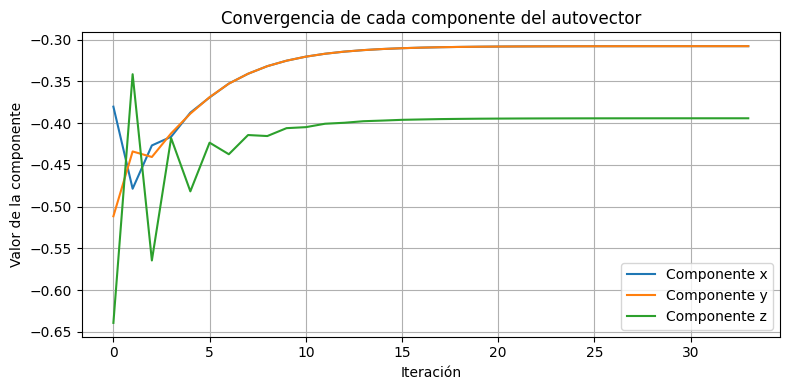

TypeError: Axes3D.scatter() got multiple values for argument 'c'

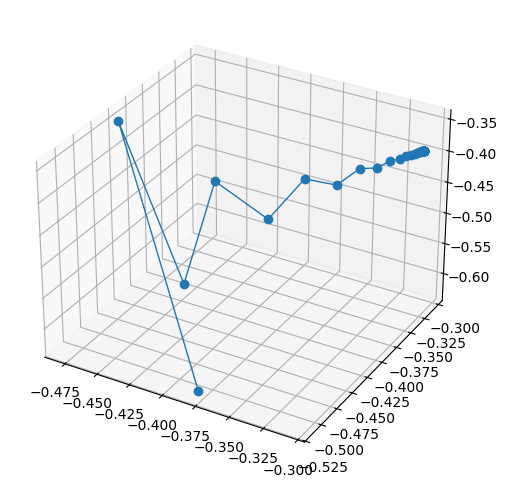

In [7]:
def metpot(A,v,k):
    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
    return v

# A = np.array([[0.9, 0.075, 0.025], [0.15, 0.8, 0.05], [0.25, 0.25, 0.5]])
# v = np.array([1,0.5,-0.75])


avec, aval, _ = metpot1(A, 1e-10, plot=True)


### 1 - Autovectores y autovalores de $L$ y $R$

a) Muestre que el vector unos es autovector de las matrices $R$ y $L$. ¿Que autovalor tiene? ¿Y que agrupacion de la red representa?

### 2 - Extensiones metodo de la potencia

#### Shifting de autovalores

In [8]:
avec_A, aval_A,_ = metpot1(A)

print(f"Autovector de A:\n{avec_A}\nautovalor asociado: {aval_A}")
mu = 3
M = A + mu*np.eye(A.shape[0])

avec_M, aval_M, _ = metpot1(M) 
print(f"Autovector de A:\n{avec_M}\nautovalor asociado: {aval_M}")

print("aval_A + mu == aval_M: ",np.allclose(aval_A + mu, aval_M))

# Como A tiene 0 en su diagonal diremos que M = A + 0I para confirmar que M no es inversible

calcular_inversa(*calculaLU(A))

Autovector de A:
[0.30777463 0.30777463 0.39415594 0.3941565  0.39404892 0.39404949
 0.30763757 0.30763757]
autovalor asociado: 3.5615527825683806
Autovector de A:
[-0.30785779 -0.30785779 -0.39422114 -0.39422114 -0.39398424 -0.39398424
 -0.30755437 -0.30755437]
autovalor asociado: 6.561552664625437
aval_A + mu == aval_M:  True
La matriz no es inversible


/home/agus_russo/UBA/TP2-alc-2025-2C/template_funciones.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  factor = U[j, i] / U[i, i]  # Calculo del factor de eliminacion
/home/agus_russo/UBA/TP2-alc-2025-2C/template_funciones.py:42: RuntimeWarning: invalid value encountered in multiply
  U[j, i:] = U[j, i:] - factor * U[i, i:]  # Esacalonamos las filas
/home/agus_russo/UBA/TP2-alc-2025-2C/template_funciones.py:42: RuntimeWarning: invalid value encountered in cast
  U[j, i:] = U[j, i:] - factor * U[i, i:]  # Esacalonamos las filas
/home/agus_russo/UBA/TP2-alc-2025-2C/template_funciones.py:41: RuntimeWarning: invalid value encountered in scalar divide
  factor = U[j, i] / U[i, i]  # Calculo del factor de eliminacion


#### Método de la potencia inverso

Por lo mencionado anteriormente si  $\lambda_{i} \neq 0 \forall i \rightarrow L + \mu I$ es inversible. Nos podemos asegurar de que ningun elementod de la diagonal sea igual a 0.  

In [ ]:
L = calcula_L(A)
mu = 1
print(np.diag(L+mu*np.eye(L.shape[0])))

v1, l1, _ = metpotI(L, mu)
print(f"Autovector de autovalor mas chico:\n{v1}\nAutovalor mas chico: {l1}")

#El autovalor es casi 1 ya que le sumamos 1 a los autovalores de L. Si lo restamos obtenemos el autovalor mas chico en modulo de L que es 0.
print(np.allclose(0,l1-mu))

[4. 4. 5. 5. 5. 5. 4. 4.]
Autovector de autovalor mas chico:
[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]
Autovalor mas chico: 0.9999999999999998
True


#### Deflación de Hotelling

Usaremos $A$ que sabemos que es simetrica y por lo tanto tiene una base de autovectores ortogonales para mostrar que una vez deflacionada A, $deflaciona(A) = A'$ su autovector $v_{1}$ asociado al autovalor de mayor modulo $\lambda_{1}$ de A, ahora para $A'$ esta asociado al autovalor 0. Para eso vamos a suponer que si $\lambda = 0$ es el autovalor asociado a $v_{1}$ vale que:

$$ A'v_{1} = \lambda v_{1} = 0v_{1} = 0 $$

In [22]:
#Calculamos el autovector y autovalor de mayor modulo para A
v1,l1,_= metpot1(A,1e-17)

#Aplicamos la deflación a A para obtener A'
deflA = deflaciona(A)

#Calculamos A'v_1
print(deflA@v1)
print(np.allclose(0,deflA@v1))

[-6.51574089e-09 -6.51574089e-09 -5.08735720e-09 -5.08731635e-09
  5.08731635e-09  5.08735709e-09  6.51574103e-09  6.51574100e-09]
True
